# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [96, 110, 181]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,23,2616,8118,145,3874,217
1,11818,1648,1694,2276,169,1647
2,112151,29627,18148,16745,4948,8550


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Frozen: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

The table below shows how each of the indexes did when comparing their values to the mean values above for each 
product category.

| Index  | Fresh     | Milk   | Grocery | Frozen | Detergents_Paper | Delicatessen |
| ------ | --------- | ------ | ------- | ------ | ---------------- | ------------ |
|  96    | below  | below     | *(close)*   | below       | **above**        | below    |
|  110   | *(close)*  | below     | below   | below       | below        | *(close)*    |
|  183   | **above**  | **above**     | **above**   | **above**      | **above**     | **above**    |

* Index 96 -- This one is below average in all the categories except for groceries, which is close to the mean value, and detergents/paper, which is above average. This makes me think it's a **casual restaurant** that cooks up a lot of grocery items but also needs a lot of napkins and detergents to clean up after customers.
* Index 110 -- This one spends average on fresh and deli categories, but below average on everything else. This one makes me think it's a **sandwich catering business**. It's not a sit-down establishment. Otherwise, their detergents and paper spending should be higher.
* Index 183 -- This one has way above the average amounts of spending across the board for all categories. I would say this one is some type of **grocery store** that needs pretty much everything to sell in bulk to its own customers.

I'd like to note that it's possible that these customers are just getting certain items elsewhere. I made my guess on the type of establishment based on a possibly flawed assumption that they're not buying anything from anywhere else. It is possible that our current wholesale distributor just doesn't have competitive prices for certain items, but I'm not sure.


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
# NOTE: I made some modifications so that I could see what it looks for all features.

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

for category in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']:

    print("---- Without {}".format(category))
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = pd.DataFrame(data)
    new_data.drop([category], axis = 1, inplace = True)
    y = data[category]
    
    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(new_data, 
                                                        y, 
                                                        test_size = 0.25, 
                                                        random_state = 42)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state = 42)
    regressor.fit(X_train, y_train)
    
    # TODO: Report the score of the prediction using the testing set
    predictions_test = regressor.predict(X_test)
    rscore = r2_score(y_test, predictions_test)
    print("R^2 score: {}".format(rscore))

---- Without Fresh
R^2 score: -0.385749710204
---- Without Milk
R^2 score: 0.156275395017
---- Without Grocery
R^2 score: 0.681884008544
---- Without Frozen
R^2 score: -0.210135890125
---- Without Detergents_Paper
R^2 score: 0.271666980627
---- Without Delicatessen
R^2 score: -2.2547115372


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

I wasn't sure which feature to remove, so I tweaked the code and tried predicting them all. The table below shows my R^2 scores with the positive ones in bold:

| Predicted Category  | R^2 Score |
| --------- | --------- |
|  Fresh    | -0.385749710204  | 
|  Milk     | **0.156275395017**  | 
|  Grocery  | **0.681884008544**  | 
|  Frozen   | -0.210135890125  | 
|  Detergents_Paper  | **0.2716669806278** | 
|  Delicatessen      | -2.2547115372  | 

Out of all the positive ones, the Grocery feature scored the highest with 0.68. This indicates the other features are able to somewhat capture the Grocery feature. Detergents_Paper and Milk also had positive R^2 scores, but they were still low, so I'd keep those two based on the table above. The Grocery feature would be the only feature that I'd consider removing, and we should keep the others. 

Looking further at the Grocery feature, the R^2 value of 0.68 still seems low.  R^2 is essentially the square of the correlation between 'Grocery' and the other features. I don't really know what percentage of correlation to look for. 90% might make me feel better, but my reasoning is just warm and fuzzy.

At this point, with the R^2 scores above, I still think all of the features are necessary.

Citation: https://people.duke.edu/~rnau/rsquared.htm

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

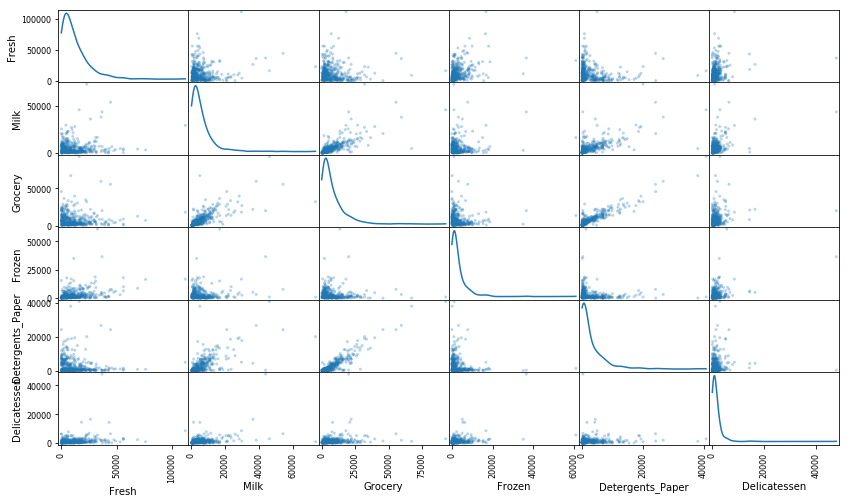

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

In [6]:
# HINT: look at the correlation matrix for the data frame
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


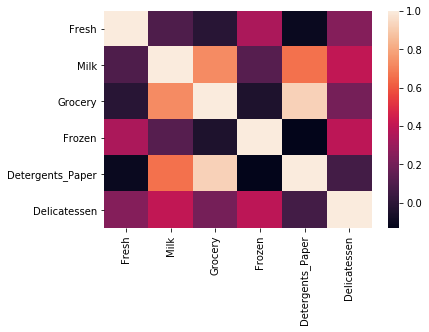

In [7]:
# HINT: Visualize using a heatmap of the data correlation
import seaborn as sns
sns.heatmap(data.corr())

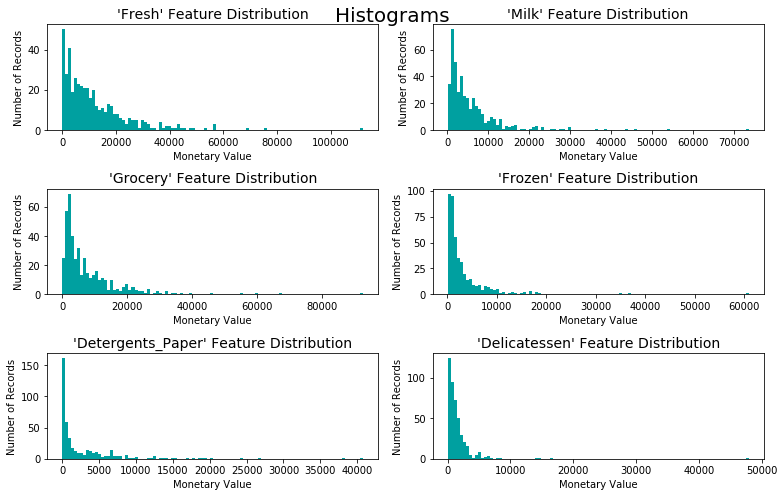

In [8]:
# HINT: Visualize the distribution of the data
#
# The code was initially taken from the finding_donors project and modified for this project.
# I would have modified the visuals.py, but I think the instructions explicitly said not to change it,
# so I'm putting it here.

import matplotlib.pyplot as plt

def plot_distribution(data):
    """                                                                                                                                            
    Visualization code for displaying skewed distributions of features                                                                             
    """

    # Create figure                                                                                                                                
    fig = plt.figure(figsize = (11,7))
    fig.suptitle("Histograms", fontsize=20)

    # Skewed feature plotting                                                                                                                      
    for i, feature in enumerate(['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']):
        ax = fig.add_subplot(3, 2, i+1)
        ax.hist(data[feature], bins = 100, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Monetary Value")
        ax.set_ylabel("Number of Records")
        #ax.set_xlim((0, 25000)) # Cutting off some of the data for better visualization without outliers

    fig.tight_layout()
    fig.show()

plot_distribution(data)

**Answer:**

#### Scatter Matrix Observations

The 'kde' density plots on the scatter matrix show that the the data has right-skewed distributions. These are not normal distributions. They all have a large number of data points near 0, but 'Detergents_Paper' is the worst culprit, followed by  'Delicatessen' and 'Frozen'. Outliers exist for each feature, and they can be seen a little more clearier with the Histogram plots (directly above). For example, the 'Frozen' feature has most of its data points under 20,000, but at least one point is past 60,000.

Citations: [KhanAcademy:skewedDensityCurves](https://www.khanacademy.org/math/ap-statistics/density-curves-normal-distribution-ap/density-curves/v/median-mean-and-skew-from-density-curves)

#### Correlation and Heatmap

From the plots above, I don't see any relationship between the features that resulted in a negative R^2 score from question 2. However, for the ones that had a positive score (Grocery, Detergents_Paper, Milk), I can see what looks like a best fit line that show some correlation between the variables. The clearest line is between Grocery and Detergents_Paper.

Using the hinted-at heatmap of the correlation data, you can see that the Detergents_Paper and Grocery are the highest correlated features. This confirms what we saw with the R^2 values. (However, I don't understand why Detergents_Paper doesn't have a higher R^2 score if the two values are so correlated.)

#### Data  Distribution
As started earlier, the data isn't normally distributed. They're all right-skewed, with most of the points clumped to the left. There are a lot of outliers. Many of the max values are way far right on the graph, away from the majority of the other data points.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

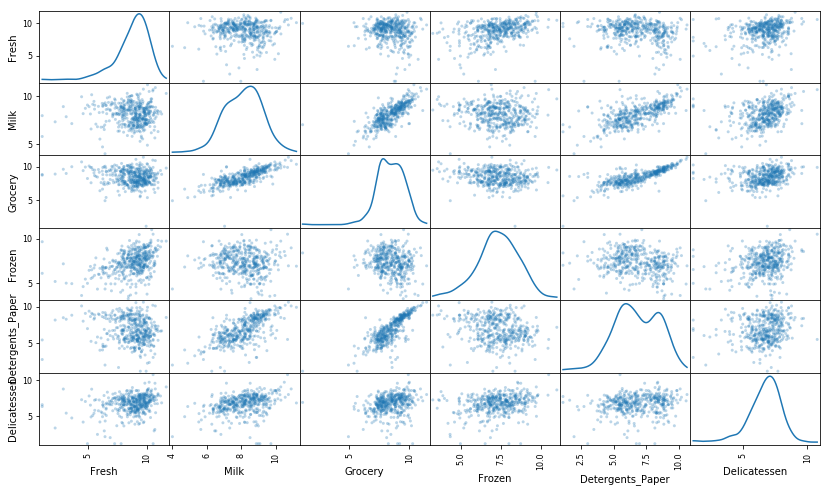

In [9]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(pd.DataFrame(data))

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(pd.DataFrame(samples))

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
1,9.377379,7.407318,7.434848,7.730175,5.129899,7.406711
2,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687


In [11]:
# Display the original samples again to avoid having to scroll up again
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,23,2616,8118,145,3874,217
1,11818,1648,1694,2276,169,1647
2,112151,29627,18148,16745,4948,8550


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.


**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [12]:
outlier_key_set = set([])
duplicate_outlier_key_set = set([])

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    median = np.median(log_data[feature])
    step = 1.5 * (Q3 - Q1)
    print("Q1, Q3, step: {}, {}, {}".format(Q1, Q3, step))
    print("Boundaries for outliers: <= {}, >= {}".format(Q1 - step, Q3 + step))
    
    # Display the outliers
    outlier_data = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(outlier_data)
    outlier_set = set(outlier_data.index.to_list())
    current_intersect = outlier_key_set.intersection(outlier_set) # current duplicate keys
    outlier_key_set = set.union(outlier_key_set, outlier_set)
    duplicate_outlier_key_set = set.union(duplicate_outlier_key_set, current_intersect)
    print("Duplicate outlier data indices from this set: {}".format(current_intersect))
    print("Growing set of outlier data indices: {}".format(outlier_key_set))
    print("Growing set of duplicate outlier data indices: {}\n---\n".format(duplicate_outlier_key_set))
    
# OPTIONAL: Select the indices for data points you wish to remove
#outliers  = list(outlier_key_set)
outliers  = list(duplicate_outlier_key_set)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print("Removing {} outliers. We're left with {} good samples.".format(len(outliers), len(good_data)))

Q1, Q3, step: 8.04805870221, 9.73706394795, 2.53350786861
Boundaries for outliers: <= 5.51455083361, >= 12.2705718166
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Duplicate outlier data indices from this set: set([])
Growing set of outlier data indices: set([128, 65, 66, 193, 81, 338, 218, 412, 95, 96, 353, 355, 357, 171, 304, 305])
Growing set of duplicate outlier data indices: set([])
---

Q1, Q3, step: 7.33498124004, 8.88048008859, 2.31824827282
Boundaries for outliers: <= 5.01673296722, >= 11.1987283614
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Duplicate outlier data indices from this set: set([])
Growing set of outlier data indices: set([128, 65, 66, 193, 81, 338, 86, 218, 412, 154, 95, 96, 353, 98, 355, 356, 357, 171, 304, 305])
Growing set of duplicate outlier data indices: set([])
---

Q1, Q3, step: 7.67461620137, 9.27385367724, 2.3988562138
Boundaries for outliers: <= 5.27575998758, >= 11.672709891
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Duplicate outlier data indices from this set: set([154])
Growing set of outlier data indices: set([128, 65, 66, 193, 75, 81, 338, 86, 218, 412, 154, 95, 96, 353, 98, 355, 356, 357, 171, 304, 305])
Growing set of duplicate outlier data indices: set([154])
---

Q1, Q3, step: 6.60967774917, 8.17589608318, 2.34932750101
Boundaries for outliers: <= 4.26035024816, >= 10.5252235842
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Duplicate outlier data indices from this set: set([65])
Growing set of outlier data indices: set([128, 65, 66, 325, 193, 264, 75, 81, 338, 86, 420, 218, 412, 154, 95, 96, 353, 98, 355, 356, 357, 38, 145, 171, 429, 175, 304, 305, 439, 57])
Growing set of duplicate outlier data indices: set([65, 154])
---

Q1, Q3, step: 5.54810142479, 8.27434059875, 4.08935876094
Boundaries for outliers: <= 1.45874266385, >= 12.3636993597
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Duplicate outlier data indices from this set: set([75])
Growing set of outlier data indices: set([128, 65, 66, 325, 193, 264, 75, 81, 338, 86, 356, 218, 412, 154, 95, 96, 353, 98, 355, 420, 357, 38, 145, 161, 171, 429, 175, 304, 305, 439, 57])
Growing set of duplicate outlier data indices: set([65, 154, 75])
---

Q1, Q3, step: 6.01187465693, 7.50672842655, 2.24228065442
Boundaries for outliers: <= 3.76959400251, >= 9.74900908097
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Duplicate outlier data indices from this set: set([128, 66, 154])
Growing set of outlier data indices: set([128, 193, 264, 137, 142, 145, 154, 412, 285, 161, 420, 38, 171, 429, 175, 304, 305, 439, 184, 57, 187, 65, 66, 203, 325, 289, 75, 81, 338, 86, 343, 218, 95, 96, 353, 98, 355, 356, 357, 233, 109, 183])
Growing set of duplicate outlier data indices: set([128, 65, 66, 154, 75])
---

Removing 5 outliers. We're left with 435 good samples.


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

* Outlier indices for more than one feature: [128, 65, 66, 154, 75]
* Should they be removed? Maybe. If I thought these were mistakes, then I would drop them without hesitating. However, because I don't know if they are or not (see below), I'll assume they're all valid data points. When using K-Means Clustering, outliers can move the cluster centers closer to the outliers, which could negatively impact the cluster boundaries for that cluster.
* Explain why I removed the outliers: Initially, I thought to remove all of the outliers, but that would have been almost 10% of the data, which seems like too much. Removing the outliers for more than one feature removes close to 1% of the data, which seemed easier to accept. We can remove the worst of the outlier offenders to mitigate the negative impact using K-Means clustering without removing a significant portion of the data set. For now, I've deciding on removing the outliers, but I would probably consider rerunning additional analysis on the unedited set later in order to see if it impacts the clusters more than expected.

Citation: [theanalysisfactor.com:droppingOutliers](https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/)


In [13]:
# Show the data samples with multiple outliers
multi_outlier_samples = pd.DataFrame(data.loc[outliers], columns = data.keys()).reset_index(drop = True)
print("Samples of wholesale customers dataset with multiple outliers:")
display(multi_outlier_samples)

Samples of wholesale customers dataset with multiple outliers:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,140,8847,3823,142,1062,3
1,85,20959,45828,36,24231,1423
2,9,1534,7417,175,3468,27
3,622,55,137,75,7,8
4,20398,1137,3,4407,3,975


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

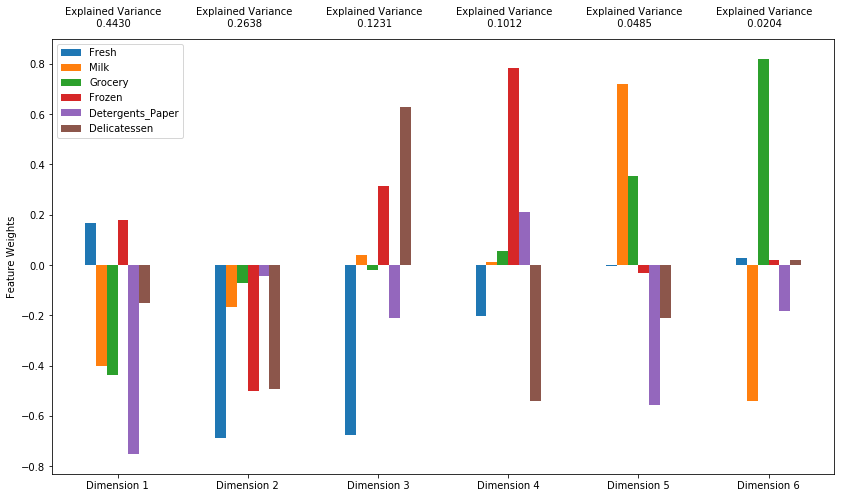

In [14]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6, whiten=True, random_state=42)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

In [15]:
# TAKEN FROM: https://etav.github.io/python/scikit_pca.html
# Trying to find explained variance
# This is just an easier way to add up the numbers from the visualization above.
variance = pca.explained_variance_ratio_ #calculate variance ratios
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var

array([ 44.3,  70.7,  83. ,  93.1,  98. , 100. ])

**Answer:**

In total, the first and second principal components explain 70.7% of the variance in the data.

When looking at the first four principal components, 93.1% of the variance is explained.

Looking at the visualization, I'm basically drawn to the longest bars for each dimension.
* Dimension 1: Negative-weighted Detergents_Paper, Grocery, Milk
* Dimension 2: Negative-weighted Fresh, Frozen, Deli
* Dimension 3: Negative-weighted Fresh + positive-weighted Frozen and Deli
* Dimension 4: Positive-weighted Frozen + negative-weighted Deli

In general, the first dimension represent mainly spending from Detergents_Paper, Grocery, and Milk. The next three dimensions represent mainly spending from Fresh, Frozen, and Deli.

NOTE: The last two dimensions that represent about 7% of the explained variance go back to representing mainly the Detergents_Paper, Grocery, and Milk. I guess I'm supposed to notice that those were the features that had positive R^2 values in Question 2? The last dimension that explains only 2% of the explained variance is most affected by the Grocery, which is the one that I potentially considered removing based on the R^2 score alone.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [16]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.1239,3.4211,1.7062,0.3460,-0.6278,0.1728
1,0.9662,-0.4314,0.4503,-0.5972,-0.1636,-0.2343
2,-1.0268,-2.9533,0.0007,0.4735,0.7143,-0.4343


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [17]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2, whiten=True, random_state=42)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
# NOTE: Changing this from log_data to log_samples to do a comparison in next Observation
#pca_samples = pca.transform(log_data)
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [18]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.1239,3.4211
1,0.9662,-0.4314
2,-1.0268,-2.9533


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

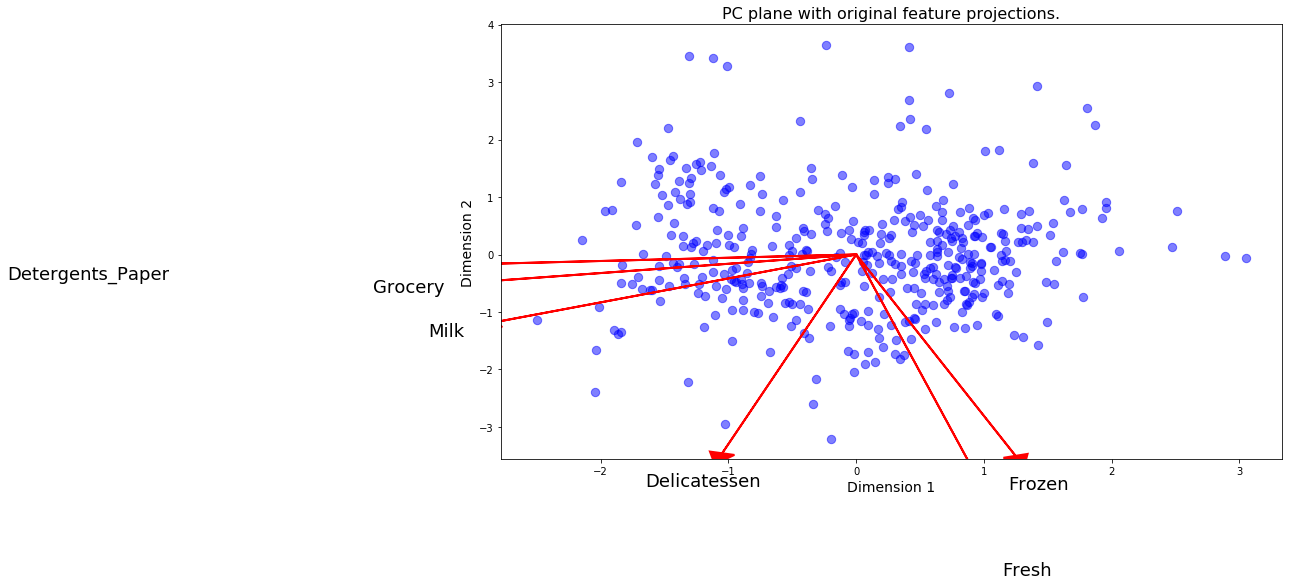

In [19]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

#### K-Means Clustering Advantages

K-Means clustering divides up the points into "K" clusters, where each point gets put into only one of your clusters. This is "hard" clustering.

If you know how many clusters you want beforehand, and your clusters are generally circular/spherical/so on, then K-Means is a straightforward way to do it. It uses distance to determine which clusters your points belong. Just normalize your data, and fit it to find the clusters. It's also one of the faster clustering algorithms. If you know that your clusters generally won't overlap, then this is good.

Note: It doesn't always capture the clusters that have shapes not well captured by distance to a centroid (e.g., the two-crescent problem, concentric circles, etc.).

Citations: [towardsdatascience:kmeans](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a),
[sklearn:KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

#### GMM Clustering Advantages

According to the lectures, Gaussian Mixture Model (GMM) clustering puts each point into every cluster, where the membership of each point in a cluster can be calculated using a Gaussian distribution to determine its likelihood of belonging to that cluster. This is a "soft" clustering algorithm.

This clustering method can capture clusters that aren't necessarily distance based on a circle.

There's a bit of flexibility here because it's a soft clustering algorithm. A single data point could be part of multiple clusters.

Citations: [sklearn:GMM](https://scikit-learn.org/stable/modules/mixture.html),
[quora:GMMAdvantages](https://www.quora.com/What-are-the-advantages-to-using-a-Gaussian-Mixture-Model-clustering-algorithm)

#### Which would I try?

This is tough. I would try to use K-Means when I think there's a clear boundary between clusters. I would lean more towards soft clustering (i.e., GMMs) when I think the clusters are a bit blurred, but I'm not sure if they are at this point.

Citations: [wikipedia:ClusterAnalysis](https://en.wikipedia.org/wiki/Cluster_analysis)

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [20]:
#from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for num_clusters in [2, 4, 10, 50, 100, 200, 3]:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    #clusterer = GaussianMixture(n_components=num_clusters, random_state=42)
    clusterer = KMeans(n_clusters=num_clusters, random_state=42)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    # TODO: I originally thought to use GMMs, but I don't see cluster_centers_ in the documentation?
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)

    print("Silhouette Score for {} clusters: {}".format(num_clusters, score))

Silhouette Score for 2 clusters: 0.375066218026
Silhouette Score for 4 clusters: 0.366376665931
Silhouette Score for 10 clusters: 0.358829936237
Silhouette Score for 50 clusters: 0.371237355423
Silhouette Score for 100 clusters: 0.361210108759
Silhouette Score for 200 clusters: 0.355843749919
Silhouette Score for 3 clusters: 0.390255357431


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

| Num Clusters  | Silhouette scores |
| --------- | --------- |
| 2 | 0.375066218026
 **3** | **0.390255357431**
| 4 | 0.366376665931
 10 | 0.358829936237
 50 | 0.371237355423
 100 | 0.361210108759
 200 | 0.355843749919

Three clusters provided the best silhouette score from the number of clusters that I tried.

*NOTE: None of my scores are above .4? Is this okay? I was expecting higher silhouette scores than .39.*

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

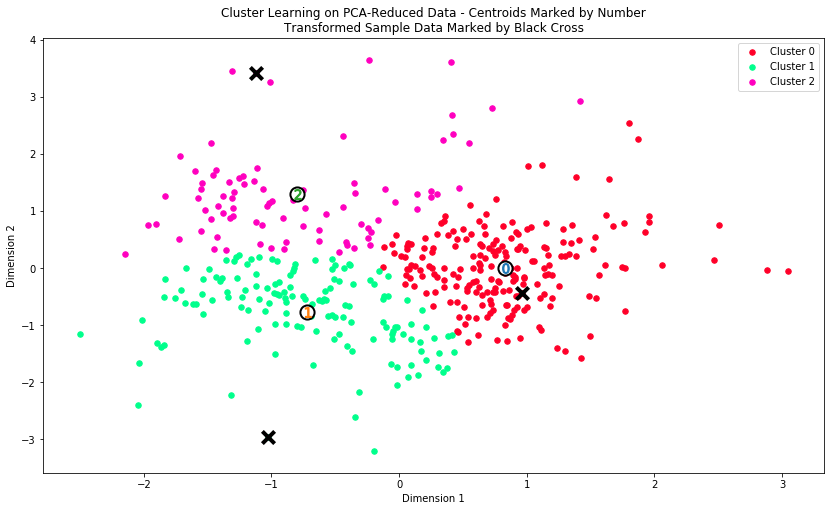

In [21]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [22]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8537.0,1662.0,2173.0,2063.0,237.0,615.0
Segment 1,11787.0,7788.0,10168.0,2168.0,3024.0,1902.0
Segment 2,1120.0,4716.0,8592.0,386.0,2960.0,365.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

In [23]:
# Display the description of the dataset again to avoid scrolling up
display(data.describe()[:])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Answer:**

In the table below, I reference the mean values (i.e., below average, about average, and above average) of the data description above when looking at each "center" in the generated segments. I take some liberty with those that I think are "about average", but for the others I try to also provide which quartile it appears closest to).

| Segment  | Fresh     | Milk   | Grocery | Frozen | Detergents_Paper | Delicatessen | Possible Establishment Type |
| ------ | --------- | ------ | ------- | ------ | ---------------- | ------------ | ------------ |
|  0   |  below avg (~50%) | below avg (>25%)  | below avg (>25%) | below avg (>50%) | below avg (<25%) | below avg (>25%) | Small store |
|  1   | -*about avg*-  | **above avg (>75%)** | **above avg (<75%)**  | below avg (>50%) | -*about avg*- | **above avg (>75%)** | Grocery store or other large food retailer |
|  2   | below avg (< 25%)| below avg (>50%) | -*about avg*- | below avg (<25%) | -*about avg*- | below avg (<25%) | Cafe/Restaurant |

* I think Segment 0 could be a **small store** (e.g., like a corner mart) because it's below average on everything.  It spends close to the median on fresh and frozen goods. The frozen foods keep longer. The fresh items might be whatever specialty items that are specific to that store. For example, a mom-and-pop Italian grocery that specializes in fresh Italian breads or herbs.
* I think Segment 1 could be a **large grocery store or another large food retailer** because it has about average or above for everything except for the Frozen feature. Even for Frozen goods, because the distributions are right-skewed, it still purchased more than the median. It's purchasing a lot of everything across the board. It's hard for me to think of any place else that would buy this much except for selling this wide array back to customers.
* I think Segment 2 could be a **Cafe/Restaurant** because it's purchasing average (i.e. more than the median) amounts of paper and cleaning products and purchasing about average Grocery items.  Customers at restaurants and cafes make a mess, and they need to be able to make sure both their customers and their establishments stay clean. The grocery items could correspond to whatever foods they're cooking up to serve folks. The below average, yet higher than the median, amounts of milk make me think it's serving up specialty cofee with milk/cream, or rich desserts made from milk.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [24]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

('Sample point', 0, 'predicted to be in Cluster', 2)
('Sample point', 1, 'predicted to be in Cluster', 0)
('Sample point', 2, 'predicted to be in Cluster', 1)


In [25]:
# Let's look again at our samples:
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,23,2616,8118,145,3874,217
1,11818,1648,1694,2276,169,1647
2,112151,29627,18148,16745,4948,8550


**Answer:**

|   Sample Customer | Possible Establishment Type |
| --------| -------|
 0 | Cafe/Restaurant
 1 | Small store
 2 | Grocery store or other large food Retailer
 
This is basically what I thought before, except the "Caterer" that I originally predicted is more akin to a "small store". It seems to match up fine.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

Delivery service changes aren't likely to affect all customers equally. Using what we've done, the wholesale distributor could first carve out a small subset of customers from each segment to essentially be the guinea pigs for any change. If there aren't too many complaints after the changes to the smaller subset, then the distributor can roll out the changes to a larger subset before making it universal across all customers.

Maybe we could even try to use K-Means clustering on each of the segments we generated. For each segment, we could attempt a change at each sub-cluster, one at a time, and see if there are complaints before eventually rolling it out to everyone in the segment. 

However, if we wanted to do a change in batches that are close to eachother, maybe a hierarchical clustering approach would have been better to do (rather than K-Means or GMM-based). This way, we would have access to as many sub-groups as we would want in order to do roll-outs to similar customer types.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

(I feel like the hint gave it away.)

The existing data can be used just like any labeled data set to train a classifier (e.g., Decision Tree Classifier). The generated customer segments would be the value that we're trying to predict using our new classifier. We'd follow steps much like we did with the "Finding Donors" project.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

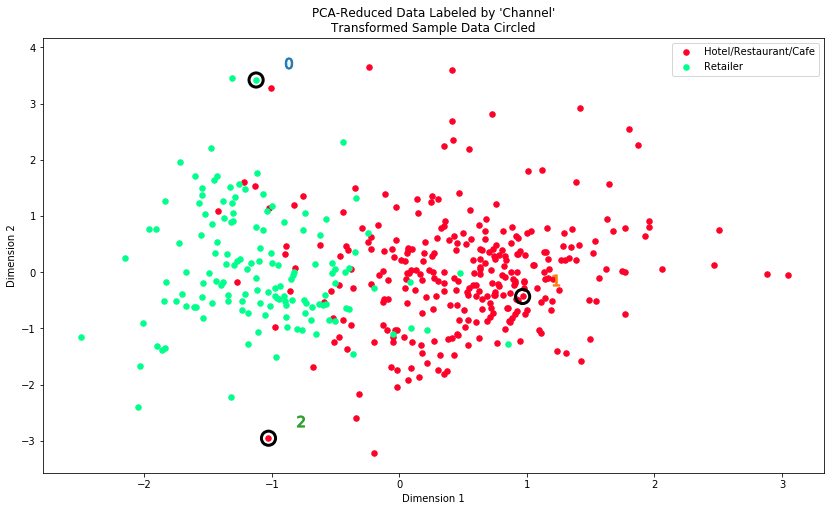

In [26]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

My (N=3) K-Means clustering is pretty terrible compared to this underlying distribution.

I might have gotten some of the retailers and some of the cafes, but I'm not sure what my third cluster (small store) does in comparison.

Out of curiosity, I went back and changed my number of clusters from 3 to 2, and the clustering looks better. (See below.) 

I also wondered about whether or not I should have tried GMM instead of a K-means clustering. I don't that did much better with my features.

Silhouette Score for 3 clusters: 0.375066218026
[[ 0.69362109 -0.09049087]
 [-1.02072649  0.13316554]]


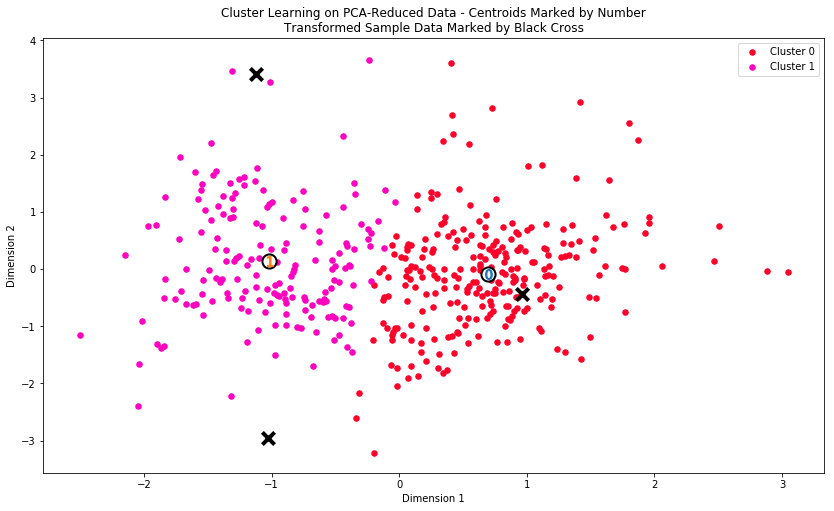

In [27]:
# Redoing KMeans clustering with only 2 clusters:
clusterer = KMeans(n_clusters=2, random_state=42)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
score = silhouette_score(reduced_data, preds)
print("Silhouette Score for {} clusters: {}".format(num_clusters, score))
vs.cluster_results(reduced_data, preds, centers, pca_samples)
print(centers)

Silhouette Score for 3 clusters: 0.376171471506


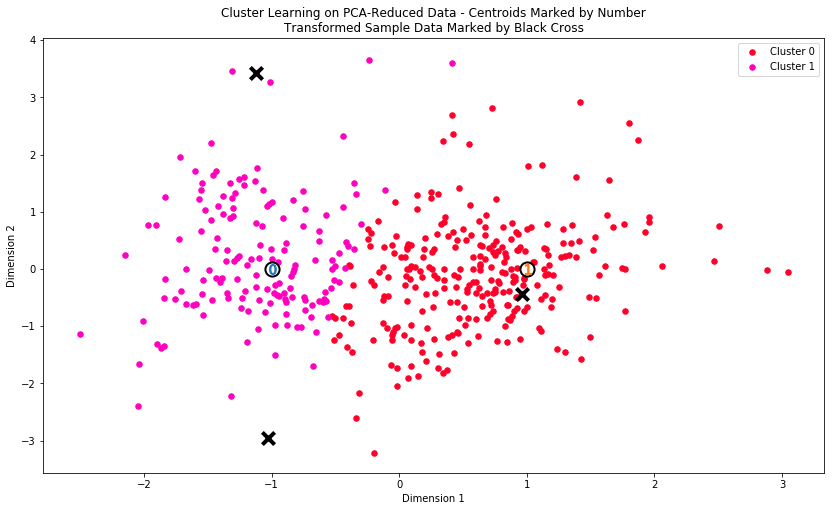

In [28]:
# Trying out using GMM without cluster centers.

from sklearn.mixture import GaussianMixture
clusterer = GaussianMixture(n_components=2, random_state=42)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
#centers = clusterer.cluster_centers_
centers_dummy = [[-1,0],[1,0]] # What's the center for a GMM?
score = silhouette_score(reduced_data, preds)
print("Silhouette Score for {} clusters: {}".format(num_clusters, score))
vs.cluster_results(reduced_data, preds, centers_dummy, pca_samples)
#print(preds)

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.